# Analiza danych z użyciem języka programowania Python

### Komentarz wstępny

* Zbiory danych nie są równoliczne - występuje 4421 ofert sprzedaży oraz 458 ofert najmu. Będą one natomiast przede wszystkim analizowane samodzielnie.
* Występują dzielnice z ilością ofert poniżej 3, co utrudnia wnioskowanie na temat ich charakterystyk. Autorzy zdecydowali się nie usuwać tych rekordów pomimo niskiej liczności z uwagi na ich właściwą reprezentację na rynku sprzedaży i najmu (i.e., ich niższa liczba odzwierciedla niską rzeczywistą podaż).

In [1]:
# Zaimportowanie niezbędnych bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
# Zmiana formatu wyświetlania danych typu float

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Utworzenie ramki danych

df = pd.read_csv("data_cleaned_for_real.csv")

In [5]:
df

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
0,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
1,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
2,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
3,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
4,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,1500000,Sopot,Górny Sopot,4,73.27,1915,2,2,0,"20,472.23",1,0,0
4875,2337500,Sopot,Górny Sopot,5,106.25,2023,3,3,0,"22,000.00",1,0,1
4876,1649000,Sopot,Górny Sopot,5,93.10,1950,2,3,1,"17,712.14",1,0,0
4877,1500000,Sopot,Dolny Sopot,3,80.00,1900,3,3,1,"18,750.00",1,0,0


In [6]:
# Podstawowe informacje o ramce danych

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cena             4879 non-null   int64  
 1   Miasto           4879 non-null   object 
 2   Dzielnica        4879 non-null   object 
 3   Pokoje           4879 non-null   int64  
 4   Pow. całkowita   4879 non-null   float64
 5   Rok budowy       4879 non-null   int64  
 6   Piętro           4879 non-null   int64  
 7   Liczba pięter    4879 non-null   int64  
 8   Balkon           4879 non-null   int64  
 9   Cena/m2          4879 non-null   float64
 10  Sprzedaż         4879 non-null   int64  
 11  Najem            4879 non-null   int64  
 12  Rynek pierwotny  4879 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 495.7+ KB


In [7]:
df[df["Sprzedaż"] == 1].count()

Cena               4421
Miasto             4421
Dzielnica          4421
Pokoje             4421
Pow. całkowita     4421
Rok budowy         4421
Piętro             4421
Liczba pięter      4421
Balkon             4421
Cena/m2            4421
Sprzedaż           4421
Najem              4421
Rynek pierwotny    4421
dtype: int64

In [8]:
df[df["Najem"] == 1].count()

Cena               458
Miasto             458
Dzielnica          458
Pokoje             458
Pow. całkowita     458
Rok budowy         458
Piętro             458
Liczba pięter      458
Balkon             458
Cena/m2            458
Sprzedaż           458
Najem              458
Rynek pierwotny    458
dtype: int64

In [9]:
# Podzielenie ramki danych na dwa podzbiory: sell (sprzedaż) i rent (najem)

sell = df[df["Sprzedaż"] == 1]
sell

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
0,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
1,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
2,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
3,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
4,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,"12,735.00",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,1500000,Sopot,Górny Sopot,4,73.27,1915,2,2,0,"20,472.23",1,0,0
4875,2337500,Sopot,Górny Sopot,5,106.25,2023,3,3,0,"22,000.00",1,0,1
4876,1649000,Sopot,Górny Sopot,5,93.10,1950,2,3,1,"17,712.14",1,0,0
4877,1500000,Sopot,Dolny Sopot,3,80.00,1900,3,3,1,"18,750.00",1,0,0


In [10]:
rent = df[df["Najem"] == 1]
rent

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
1102,2500,Gdynia,Działki Leśne,2,44.00,1960,1,5,1,56.82,0,1,0
1103,21600,Gdynia,Śródmieście,3,84.00,2020,1,4,1,257.14,0,1,0
1104,2100,Gdynia,Witomino Radjostacja,2,49.00,1998,4,4,0,42.86,0,1,0
1105,7000,Gdynia,Orłowo,2,76.08,2011,5,5,1,92.01,0,1,0
1106,6500,Gdynia,Śródmieście,2,50.00,2020,1,17,1,130.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,250,Sopot,Dolny Sopot,3,66.26,1975,4,4,1,3.77,0,1,0
4546,2900,Sopot,Wyścigi,2,38.00,2019,2,2,1,76.32,0,1,0
4547,12000,Sopot,Dolny Sopot,5,132.00,2014,3,3,0,90.91,0,1,0
4548,6000,Sopot,Dolny Sopot,3,90.00,1970,1,3,1,66.67,0,1,0


# Rynek sprzedaży

In [11]:
# Usunięcie zbędnych kolumn

sell = sell.drop(columns=['Sprzedaż', 'Najem'])

In [12]:
# Podstawowe statystyki danych sprzedażowych

sell.describe()

,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
count,"4,421.00","4,421.00","4,421.00","4,421.00","4,421.00","4,421.00","4,421.00","4,421.00","4,421.00"
mean,"1,001,553.58",2.73,62.83,"2,001.21",2.49,4.92,0.56,"15,744.48",0.33
std,"705,917.24",1.01,27.38,34.25,2.40,3.49,0.50,"6,215.30",0.47
min,"169,000.00",1.00,15.61,"1,700.00",1.00,1.00,0.00,"4,002.06",0.00
25%,"593,840.00",2.00,44.08,"1,985.00",1.00,3.00,0.00,"11,231.37",0.00
50%,"777,281.00",3.00,57.10,"2,020.00",2.00,4.00,1.00,"14,111.11",0.00
75%,"1,152,725.00",3.00,74.00,"2,024.00",3.00,5.00,1.00,"18,732.14",1.00
max,"9,725,700.00",13.00,288.80,"2,026.00",27.00,37.00,1.00,"57,894.74",1.00


In [13]:
grouped_s = sell.groupby("Miasto").mean()
grouped_s

C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\3867037762.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_s = sell.groupby("Miasto").mean()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Miasto,,,,,,,,,
Gdańsk,"910,690.42",2.65,59.24,"2,005.98",2.49,4.83,0.55,"15,443.06",0.36
Gdynia,"995,211.68",2.86,67.58,"2,000.76",2.43,5.54,0.59,"14,553.71",0.33
Sopot,"1,851,433.15",3.00,79.60,"1,959.23",2.59,3.65,0.50,"22,493.88",0.13


In [14]:
# Średnie wartości dla trzech miast oraz dodanie liczby ofert

grouped_s["Liczba ofert"] = sell.groupby(["Miasto"])["Miasto"].count()
grouped_s

,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny,Liczba ofert
Miasto,,,,,,,,,,
Gdańsk,"910,690.42",2.65,59.24,"2,005.98",2.49,4.83,0.55,"15,443.06",0.36,2991
Gdynia,"995,211.68",2.86,67.58,"2,000.76",2.43,5.54,0.59,"14,553.71",0.33,1102
Sopot,"1,851,433.15",3.00,79.60,"1,959.23",2.59,3.65,0.50,"22,493.88",0.13,328


In [15]:
# Liczba ofert na rynku wtórnym i pierwotnym

sell.groupby(["Rynek pierwotny"])["Rynek pierwotny"].count()

Rynek pierwotny
0    2943
1    1478
Name: Rynek pierwotny, dtype: int64

In [16]:
2943/(2943+1478)

0.6656864962678127

Na rynku sprzedaży przeważają oferty z rynku wtórnego (67%).

In [17]:
# Liczba ofert sprzedaży w danej dzielnicy - dolnych 20 dzielnic

In [18]:
sell.groupby(["Dzielnica"])['Dzielnica'].count().sort_values(ascending=False).tail(20)

Dzielnica
Nowy Port                      22
Kamienny Potok                 19
Karlikowo                      18
Leszczynki                     15
Matarnia                       15
Świemirowo                     14
Karwiny                        13
Pustki Cisowskie - Demptowo    12
VII Dwór                       10
Przeróbka                       9
Przylesie                       7
Wyścigi                         6
Strzyża                         6
Witomino Radjostacja            5
Brętowo                         5
Brodwino                        3
Olszynka                        3
Rudniki                         2
Szadółki                        1
Młyniska                        1
Name: Dzielnica, dtype: int64

In [19]:
# Sprawdzenie istotnych korelacji dla rynku sprzedaży

sell.corr()

C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\3440587283.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sell.corr()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Cena,1.00,0.46,0.70,-0.09,0.04,-0.01,0.06,0.70,-0.12
Pokoje,0.46,1.00,0.77,-0.09,0.01,-0.02,0.12,-0.06,-0.08
Pow. całkowita,0.70,0.77,1.00,-0.15,0.01,-0.04,0.08,0.07,-0.11
Rok budowy,-0.09,-0.09,-0.15,1.00,-0.03,0.08,0.13,0.03,0.47
Piętro,0.04,0.01,0.01,-0.03,1.00,0.58,0.03,0.06,-0.05
Liczba pięter,-0.01,-0.02,-0.04,0.08,0.58,1.00,-0.01,0.04,0.06
Balkon,0.06,0.12,0.08,0.13,0.03,-0.01,1.00,0.04,-0.15
Cena/m2,0.70,-0.06,0.07,0.03,0.06,0.04,0.04,1.00,-0.11
Rynek pierwotny,-0.12,-0.08,-0.11,0.47,-0.05,0.06,-0.15,-0.11,1.00


C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\3698613770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sell.corr(), annot=True, cmap="coolwarm")


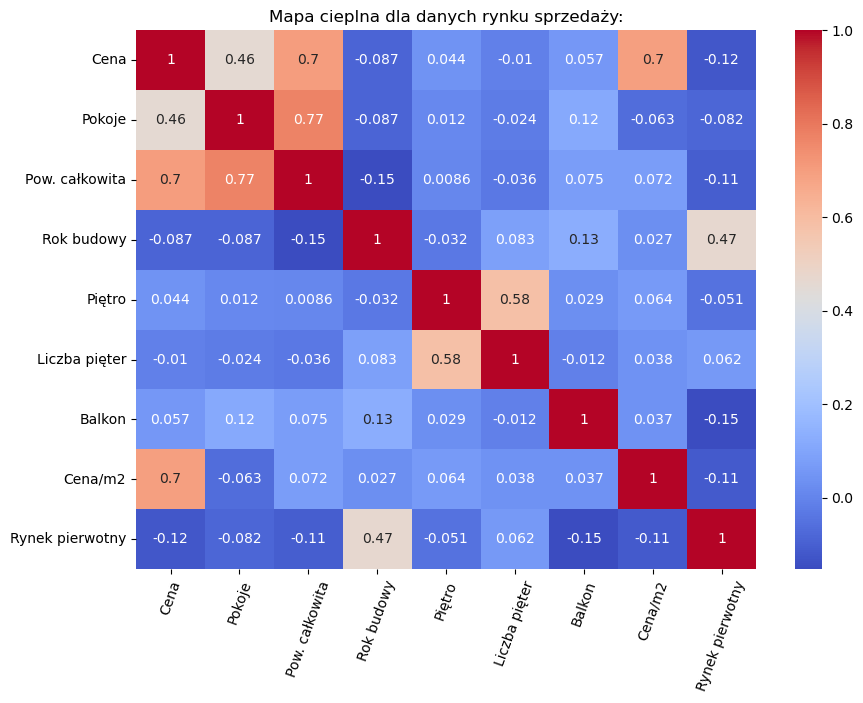

In [209]:
sns.heatmap(sell.corr(), annot=True, cmap="coolwarm")
plt.xticks(rotation=70)
plt.title("Mapa cieplna dla danych rynku sprzedaży:")
plt.show()

### Istotne korelacje: 

* Między ceną a powierzchnią całkowitą (0.7), liczbą pokoi (0.46)
* Między pokojami a powierzchnią całkowitą (0.77)
* Rokiem budowy a rynkiem pierwotnym/wtórnym (0.47)

Co ciekawe, brak istotnej zależności między posiadaniem balkonu a ceną/ceną za metr kwadratowy. Co więcej, nie ma korelacji między ceną/ceną za metr kwadratowy a rokiem budowy.

In [21]:
# Najdroższe i najtańsze lokalizacje w Trójmieście pod względem ceny za metr kwadratowy

dzielnice_s = sell.groupby(["Miasto", "Dzielnica"]).mean().sort_values("Cena/m2", ascending=False)
dzielnice_s

Cena  Pokoje  Pow. całkowita  \
Miasto Dzielnica                                                          
Gdańsk Jelitkowo                   2,449,949.98    2.90           68.28   
Gdynia Orłowo                      2,314,493.00    3.24           86.64   
Sopot  Dolny Sopot                 2,306,145.52    3.23           90.83   
       Świemirowo                  1,455,493.36    2.64           67.95   
       Wyścigi                     1,538,166.67    2.83           74.80   
...                                         ...     ...             ...   
Gdynia Pustki Cisowskie - Demptowo   664,781.67    3.17           67.14   
       Obłuże                        657,960.00    3.56           72.10   
Gdańsk Kowale                        449,277.53    2.36           47.26   
       Rudniki                       334,450.00    2.00           37.05   
       Kokoszki                      682,577.78    3.09           74.12   

                                    Rok budowy  Piętro  Liczba pięter  Balkon  \
Miasto Dzielnica                                                                
Gdańsk Jelitkowo                      2,010.40    2.17           4.38    0.88   
Gdynia Orłowo                         2,011.89    1.22           2.35    0.81   
Sopot  Dolny Sopot                    1,940.31    2.43           3.04    0.43   
       Świemirowo                     2,012.29    2.43           3.00    0.64   
       Wyścigi                        1,993.50    1.67           5.50    0.67   
...                                        ...     ...            ...     ...   
Gdynia Pustki Cisowskie - Demptowo    2,000.33    1.67           2.83    0.83   
       Obłuże                         1,987.28    2.20           4.52    0.88   
Gdańsk Kowale                         2,024.95    2.45           5.00    0.00   
       Rudniki                        1,979.00    1.00           4.00    0.00   
       Kokoszki                       2,015.31    2.53           4.64    0.60   

                                     Cena/m2  Rynek pierwotny  
Miasto Dzielnica                                               
Gdańsk Jelitkowo                   35,795.84             0.00  
Gdynia Orłowo                      25,993.17             0.16  
Sopot  Dolny Sopot                 24,971.24             0.04  
       Świemirowo                  21,453.15             0.86  
       Wyścigi                     21,266.07             0.00  
...                                      ...              ...  
Gdynia Pustki Cisowskie - Demptowo 10,058.79             0.25  
       Obłuże                       9,861.05             0.04  
Gdańsk Kowale                       9,552.59             1.00  
       Rudniki                      9,547.98             0.00  
       Kokoszki                     9,516.64             0.27  

[62 rows x 9 columns]

In [22]:
dzielnice_s["Liczba ofert"] = sell.groupby(["Miasto", "Dzielnica"])["Dzielnica"].count()
dzielnice_s

Cena  Pokoje  Pow. całkowita  \
Miasto Dzielnica                                                          
Gdańsk Jelitkowo                   2,449,949.98    2.90           68.28   
Gdynia Orłowo                      2,314,493.00    3.24           86.64   
Sopot  Dolny Sopot                 2,306,145.52    3.23           90.83   
       Świemirowo                  1,455,493.36    2.64           67.95   
       Wyścigi                     1,538,166.67    2.83           74.80   
...                                         ...     ...             ...   
Gdynia Pustki Cisowskie - Demptowo   664,781.67    3.17           67.14   
       Obłuże                        657,960.00    3.56           72.10   
Gdańsk Kowale                        449,277.53    2.36           47.26   
       Rudniki                       334,450.00    2.00           37.05   
       Kokoszki                      682,577.78    3.09           74.12   

                                    Rok budowy  Piętro  Liczba pięter  Balkon  \
Miasto Dzielnica                                                                
Gdańsk Jelitkowo                      2,010.40    2.17           4.38    0.88   
Gdynia Orłowo                         2,011.89    1.22           2.35    0.81   
Sopot  Dolny Sopot                    1,940.31    2.43           3.04    0.43   
       Świemirowo                     2,012.29    2.43           3.00    0.64   
       Wyścigi                        1,993.50    1.67           5.50    0.67   
...                                        ...     ...            ...     ...   
Gdynia Pustki Cisowskie - Demptowo    2,000.33    1.67           2.83    0.83   
       Obłuże                         1,987.28    2.20           4.52    0.88   
Gdańsk Kowale                         2,024.95    2.45           5.00    0.00   
       Rudniki                        1,979.00    1.00           4.00    0.00   
       Kokoszki                       2,015.31    2.53           4.64    0.60   

                                     Cena/m2  Rynek pierwotny  Liczba ofert  
Miasto Dzielnica                                                             
Gdańsk Jelitkowo                   35,795.84             0.00            40  
Gdynia Orłowo                      25,993.17             0.16            37  
Sopot  Dolny Sopot                 24,971.24             0.04           170  
       Świemirowo                  21,453.15             0.86            14  
       Wyścigi                     21,266.07             0.00             6  
...                                      ...              ...           ...  
Gdynia Pustki Cisowskie - Demptowo 10,058.79             0.25            12  
       Obłuże                       9,861.05             0.04            25  
Gdańsk Kowale                       9,552.59             1.00            87  
       Rudniki                      9,547.98             0.00             2  
       Kokoszki                     9,516.64             0.27            45  

[62 rows x 10 columns]

Najwyższą cenę za metr kwadratowy można zaobserwować w nadmorskich dzielnicach: w Jelitkowie, w Orłowie, w Dolnym Sopocie, Świemirowie (Sopot) oraz Sopocie Wyścigach. Najniższa cena występuje na obrzeżach miast (Kokoszki, Rudniki, Kowale, Obłuże, Pustki Cisowskie).

# Wizualizacja danych rynku sprzedaży

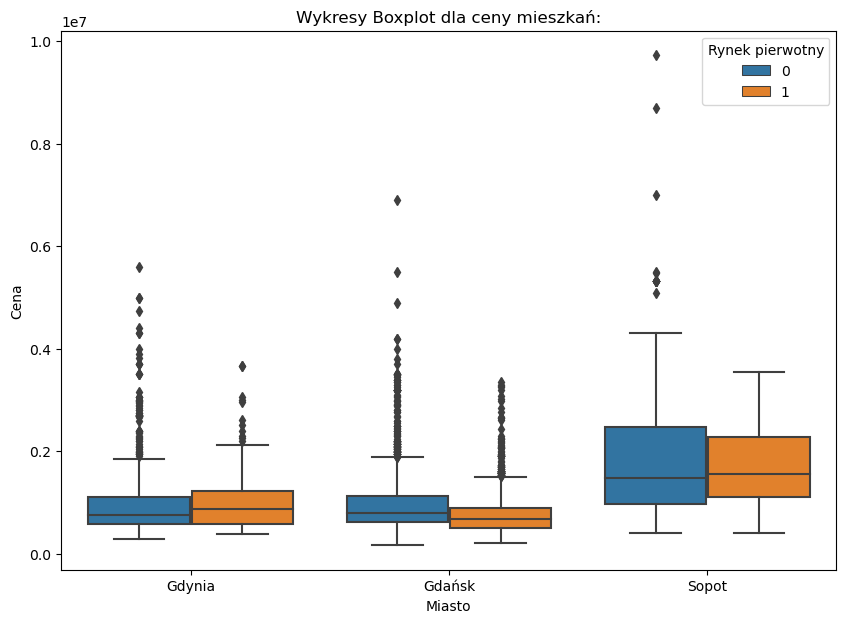

In [114]:
sns.boxplot(y="Cena", x="Miasto", hue="Rynek pierwotny", data=sell)
#można wyjebać rynek pierwotny jak brzydki jest
plt.title("Wykresy Boxplot dla ceny mieszkań:")
plt.show()

Ceny mieszkań w Sopocie są wyższe niż w pozostałych miastach. Brak widocznej różnicy między średnimi cenami na rynku wtórnym w Gdyni i Gdańsku, na rynku pierwotnym ceny w Gdyni są wyższe.

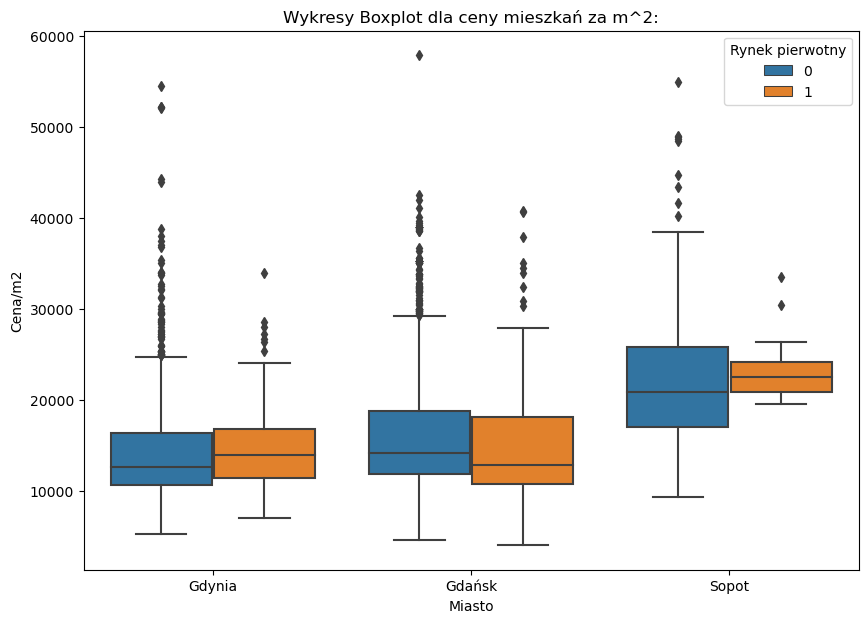

In [60]:
sns.boxplot(y="Cena/m2", x="Miasto", hue="Rynek pierwotny", data=sell)
#można wyjebać rynek pierwotny jak brzydki jest
plt.title("Wykresy Boxplot dla ceny mieszkań za m^2:")
plt.show()

Ceny za m^2 ponownie wyższe w Sopocie, jednak tym razem widać większą różnicę między Gdańskiem i Gdynią - na rynku wtórnym średnie ceny wyższe w Gdańsku, na pierwotnym - w Gdyni.

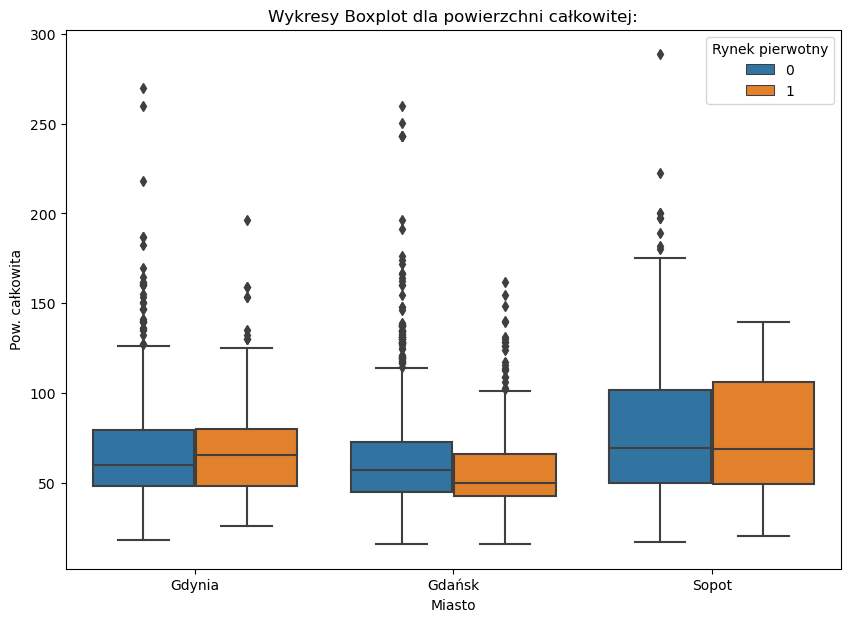

In [61]:
sns.boxplot(y="Pow. całkowita", x="Miasto", hue="Rynek pierwotny", data=sell)
#można wyjebać rynek pierwotny jak brzydki jest
plt.title("Wykresy Boxplot dla powierzchni całkowitej:")
plt.show()

Najwyższa średnia wielkość mieszkań na sprzedaż jest w Sopocie, najmniejsza w Gdańsku na rynku pierwotnym.

Text(0.5, 1.0, 'Histogram obrazujący rok budowy mieszkań:')

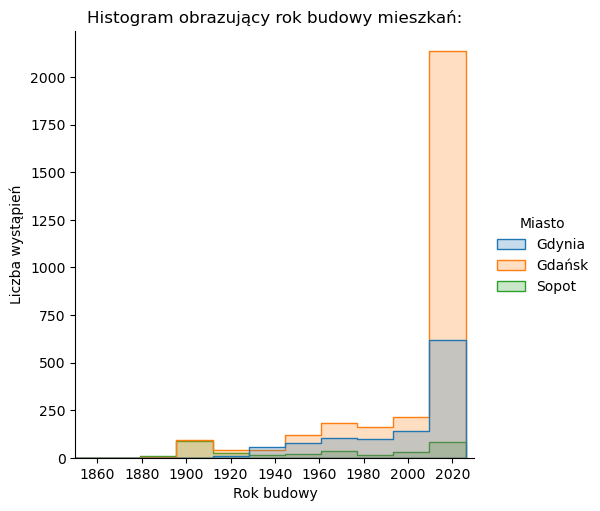

In [219]:
sns.displot(x = "Rok budowy", bins=20, data=sell, hue="Miasto", element="step")
plt.xlim(1850, 2030)
plt.ylabel("Liczba wystąpień")
plt.title("Histogram obrazujący rok budowy mieszkań:")
#można pomyśleć nad zmianą xlim, bins, wyjebać hue, zmienić displot na histplot

Zdecydowanie najwięcej mieszkań po 2000. roku jest budowane w Gdańsku, następnie w Gdyni.


Text(5.649701388888888, 0.5, 'Liczba wystąpień')

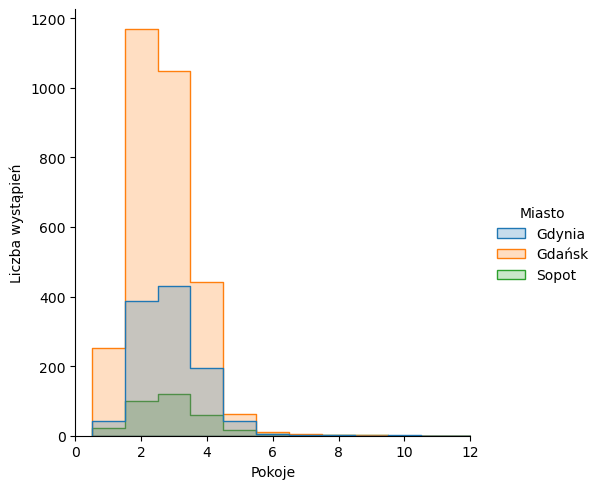

In [213]:
sns.displot(x = "Pokoje", bins=20, data=sell, hue="Miasto", discrete=True, element="step")
plt.xlim(0, 12)
plt.ylabel("Liczba wystąpień")
plt.title("Histogram obrazujący liczbę pokoi:")

Zdecydowanie dominują mieszkania 2-4 pokojowe.

Text(0.5, 1.0, 'Histogram obrazujący ceny mieszkań za m^2:')

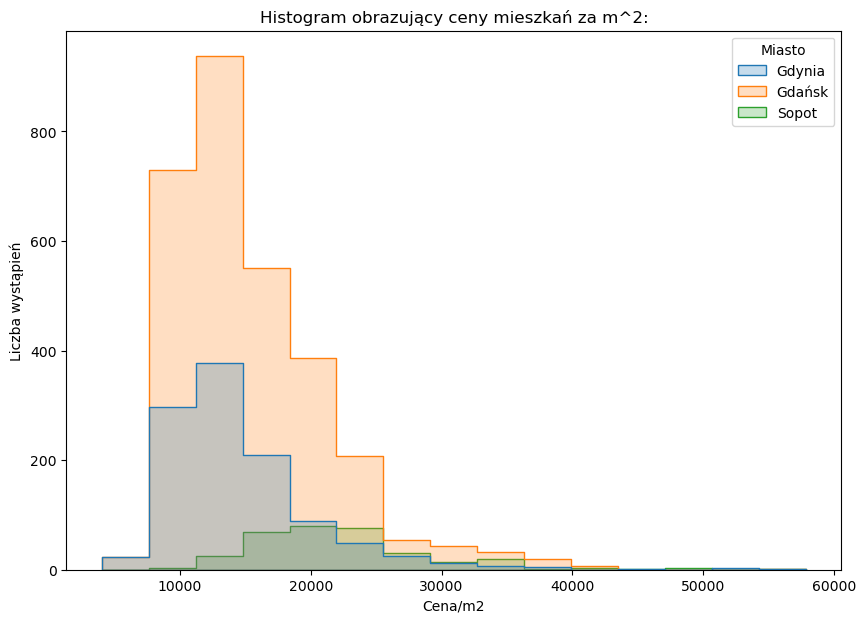

In [215]:
sns.histplot(data=sell, x="Cena/m2", hue="Miasto", bins=15, element="step")
plt.ylabel("Liczba wystąpień")
plt.title("Histogram obrazujący ceny mieszkań za m^2:")

Najwięcej ofert sprzedaży pochodzi z Gdańska, następnie z Gdyni i wreszcie z Sopotu. Wykres dla Sopotu jest najbardziej płaski - odzwierciedla to większą wariancję cenową w Sopocie niż w pozostałych dwóch miastach.

In [142]:
gd = sell.where(sell.Miasto == "Gdańsk")
ga = sell.where(sell.Miasto == "Gdynia")
gsp = sell.where(sell.Miasto == "Sopot")

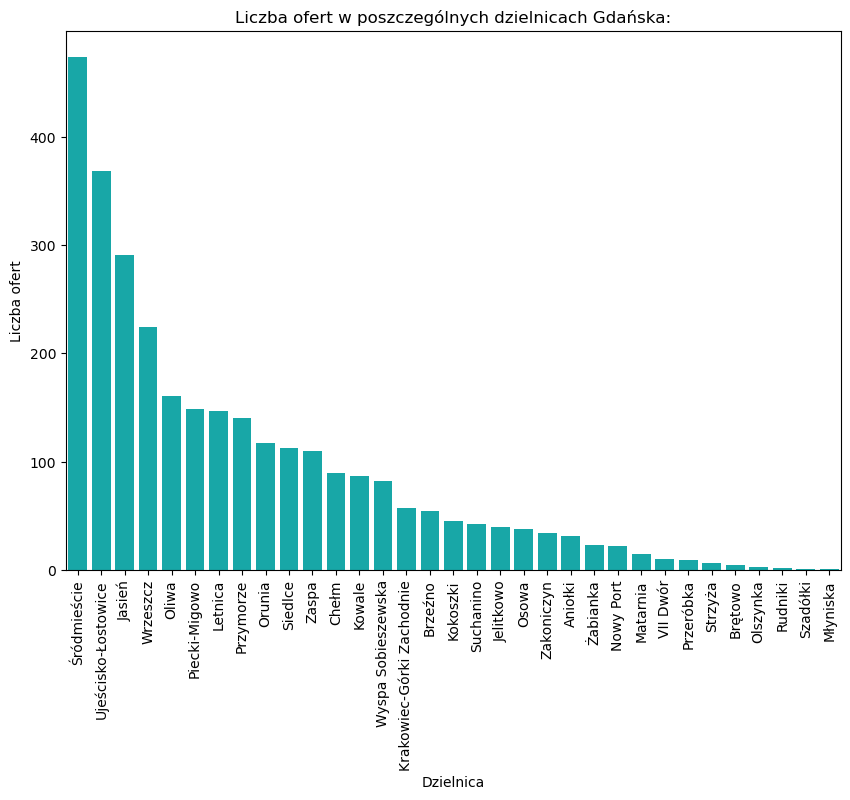

In [221]:
sns.countplot(data=gd.Dzielnica.value_counts(), x=gd.Dzielnica, order = gd.Dzielnica.value_counts().index, color="c")
plt.xticks(rotation=90)
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert w poszczególnych dzielnicach Gdańska:")
plt.show()

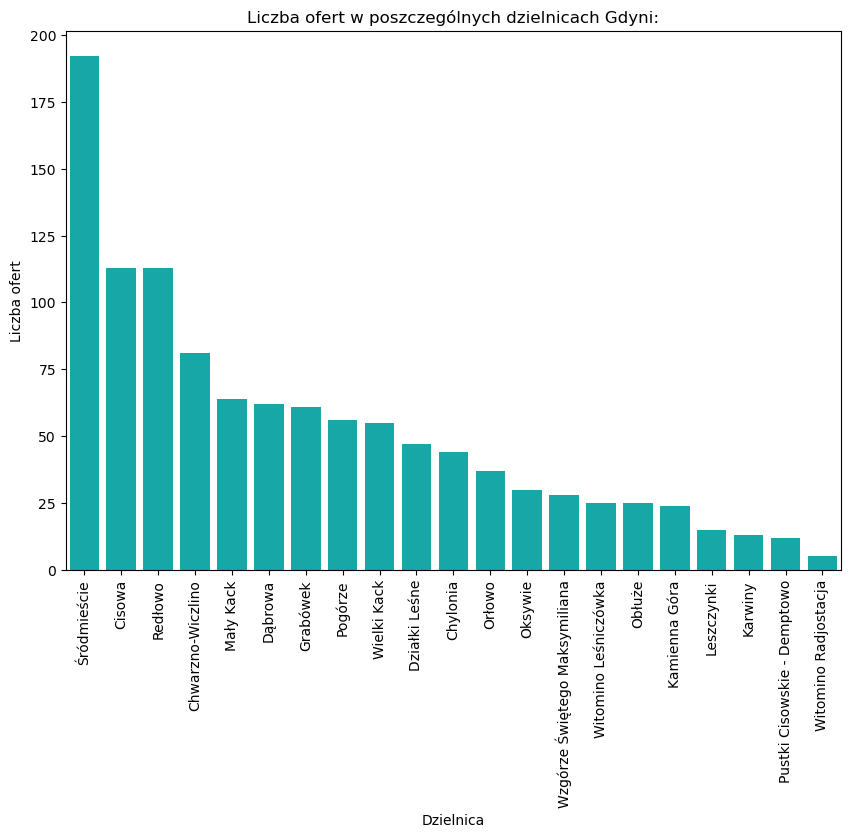

In [222]:
sns.countplot(data=ga.Dzielnica.value_counts(), x=ga.Dzielnica, order = ga.Dzielnica.value_counts().index, color="c")
plt.xticks(rotation=90)
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert w poszczególnych dzielnicach Gdyni:")
plt.show()

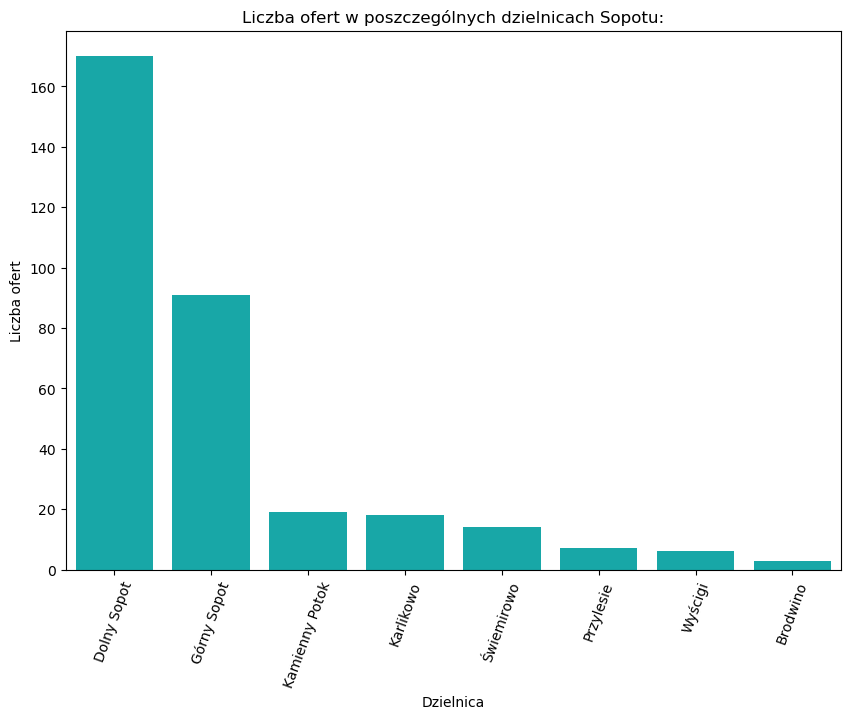

In [223]:
sns.countplot(data=gsp.Dzielnica.value_counts(), x=gsp.Dzielnica, order = gsp.Dzielnica.value_counts().index, color="c")
plt.xticks(rotation=70)
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert w poszczególnych dzielnicach Sopotu:")
plt.show()

# Rynek najmu

In [30]:
rent = rent.drop(columns=['Sprzedaż', 'Najem'])

In [31]:
rent.groupby("Miasto").mean()

C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\274963737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent.groupby("Miasto").mean()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Miasto,,,,,,,,,
Gdańsk,"3,388.22",2.15,49.46,"2,007.21",2.93,5.14,0.67,69.31,0.01
Gdynia,"3,482.87",2.34,55.94,"1,998.14",2.35,4.76,0.64,62.07,0.01
Sopot,"4,494.23",2.73,64.06,"1,984.08",3.04,4.00,0.77,70.35,0.00


In [32]:
grouped_r = rent.groupby("Miasto").mean()
grouped_r

C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\149857847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_r = rent.groupby("Miasto").mean()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Miasto,,,,,,,,,
Gdańsk,"3,388.22",2.15,49.46,"2,007.21",2.93,5.14,0.67,69.31,0.01
Gdynia,"3,482.87",2.34,55.94,"1,998.14",2.35,4.76,0.64,62.07,0.01
Sopot,"4,494.23",2.73,64.06,"1,984.08",3.04,4.00,0.77,70.35,0.00


In [33]:
# Średnie wartości dla trzech miast oraz dodanie liczby ofert

grouped_r["Liczba ofert"] = rent.groupby(["Miasto"])["Miasto"].count()
grouped_r

,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny,Liczba ofert
Miasto,,,,,,,,,,
Gdańsk,"3,388.22",2.15,49.46,"2,007.21",2.93,5.14,0.67,69.31,0.01,314
Gdynia,"3,482.87",2.34,55.94,"1,998.14",2.35,4.76,0.64,62.07,0.01,118
Sopot,"4,494.23",2.73,64.06,"1,984.08",3.04,4.00,0.77,70.35,0.00,26


In [34]:
rent.groupby(["Rynek pierwotny"])["Rynek pierwotny"].count()

Rynek pierwotny
0    455
1      3
Name: Rynek pierwotny, dtype: int64

Mała liczba ofert najmu w porównaniu do ofert sprzedaży wynika z prawdziwego stanu rynku na dzień zbierania danych do pracy.
W porównaniu do ofert sprzedaży, na rynku najmu zdecydowanie dominują oferty z rynku wtórnego (455 vs 3 na rynku pierwotnym). Z tego powodu na wykresach nie będziemy rozdzielać ofert w zależności od rynku.

In [35]:
# Liczba ofert najmu w danej dzielnicy - dolne 25

rent.groupby(["Dzielnica"])['Dzielnica'].count().sort_values(ascending=False).tail(25)

Dzielnica
Witomino Leśniczówka         3
Karlikowo                    3
Kamienna Góra                3
Osowa                        3
Dąbrowa                      3
Wyścigi                      3
Strzyża                      2
Szadółki                     2
Suchanino                    2
Witomino Radjostacja         2
Oksywie                      2
Brodwino                     2
Obłuże                       2
Matarnia                     2
Krakowiec-Górki Zachodnie    2
Kokoszki                     2
Kamienny Potok               2
Cisowa                       2
Chwarzno-Wiczlino            2
Żabianka                     2
Rudniki                      1
Chylonia                     1
Zakoniczyn                   1
Brętowo                      1
Świemirowo                   1
Name: Dzielnica, dtype: int64

In [36]:
# Sprawdzenie istotnych korelacji dla rynku najmu

rent.corr()

C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\250782620.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent.corr()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Cena,1.00,0.52,0.68,0.07,0.22,0.14,0.07,0.63,-0.04
Pokoje,0.52,1.00,0.82,-0.07,0.09,0.02,0.11,-0.11,-0.02
Pow. całkowita,0.68,0.82,1.00,-0.09,0.08,-0.01,0.07,-0.07,-0.06
Rok budowy,0.07,-0.07,-0.09,1.00,0.08,0.09,0.31,0.17,0.02
Piętro,0.22,0.09,0.08,0.08,1.00,0.71,0.11,0.16,0.01
Liczba pięter,0.14,0.02,-0.01,0.09,0.71,1.00,0.10,0.17,-0.02
Balkon,0.07,0.11,0.07,0.31,0.11,0.10,1.00,-0.03,-0.12
Cena/m2,0.63,-0.11,-0.07,0.17,0.16,0.17,-0.03,1.00,0.05
Rynek pierwotny,-0.04,-0.02,-0.06,0.02,0.01,-0.02,-0.12,0.05,1.00


C:\Users\pozyt\AppData\Local\Temp\ipykernel_12692\3834113634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=rent.corr(), annot=True, cmap="coolwarm")


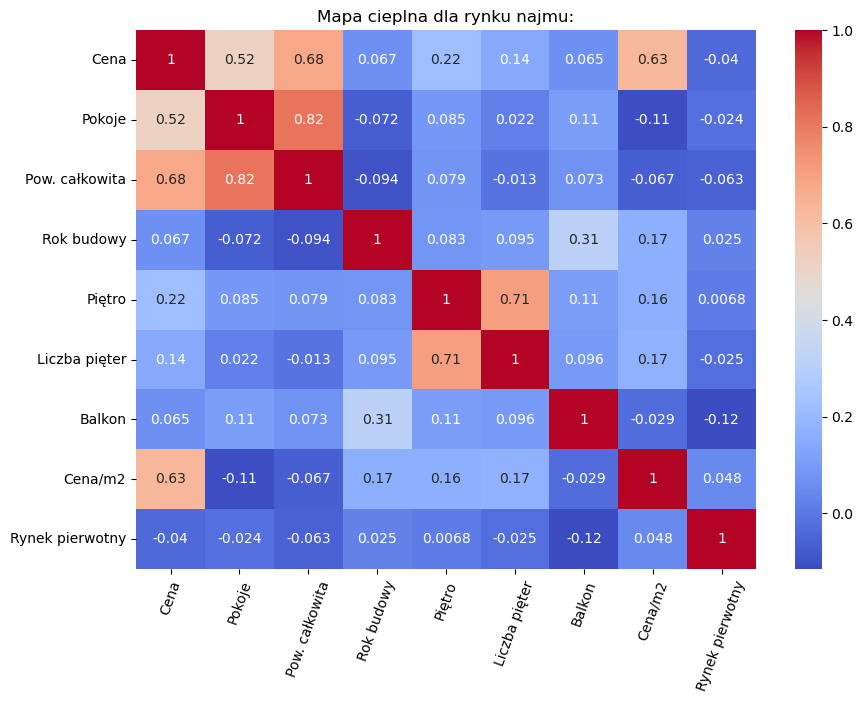

In [220]:
sns.heatmap(data=rent.corr(), annot=True, cmap="coolwarm")
plt.xticks(rotation=70) 
plt.title("Mapa cieplna dla rynku najmu:")
plt.show()

### Istotne korelacje: 

* Między ceną a powierzchnią całkowitą (0.68), liczbą pokoi (0.52)
* Między pokojami a powierzchnią całkowitą (0.82)
* Między rokiem budowy a balkonem (0.31)

Występuje słaba korelacja między piętrem a ceną (0.22) oraz między ceną za metr kwadratowy a rokiem budowy (0.17).

Co ciekawe, brak istotnej zależności między posiadaniem balkonu a ceną/ceną za metr kwadratowy. Co więcej, nie ma korelacji między ceną/ceną za metr kwadratowy a rokiem budowy.

Zgodnie z oczekiwaniami, istnieje tu nieco słabsza zależność między ceną a ceną za metr kwadratowy (0.63) niż w przypadku rynku sprzedaży (0.7).

# Wizualizacja danych rynku najmu

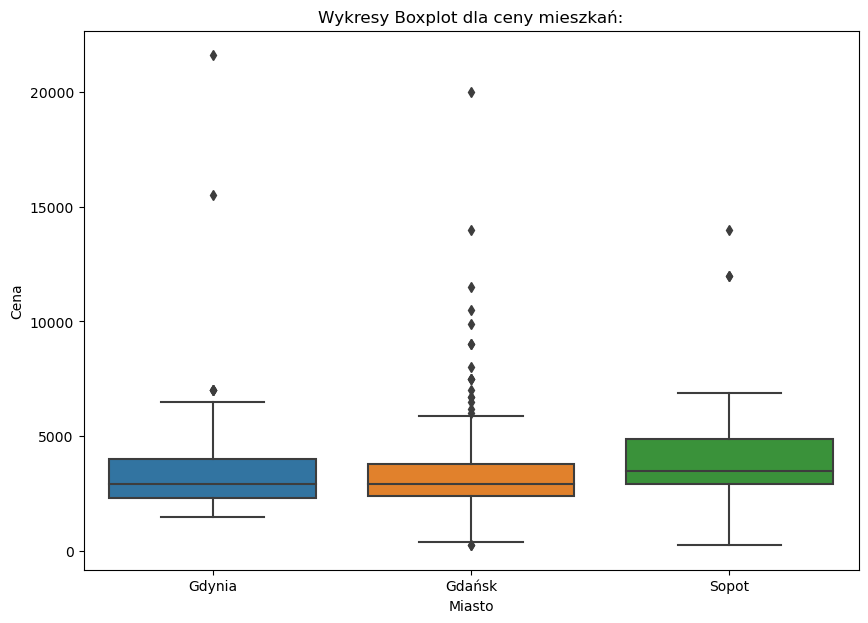

In [176]:
sns.boxplot(y="Cena", x="Miasto", data=rent)
#można wyjebać rynek pierwotny jak brzydki jest
plt.title("Wykresy Boxplot dla ceny mieszkań:")
plt.show()

Najwyższe ceny wynajmu są w Sopocie, w Gdańsku i Gdyni porównywalne.

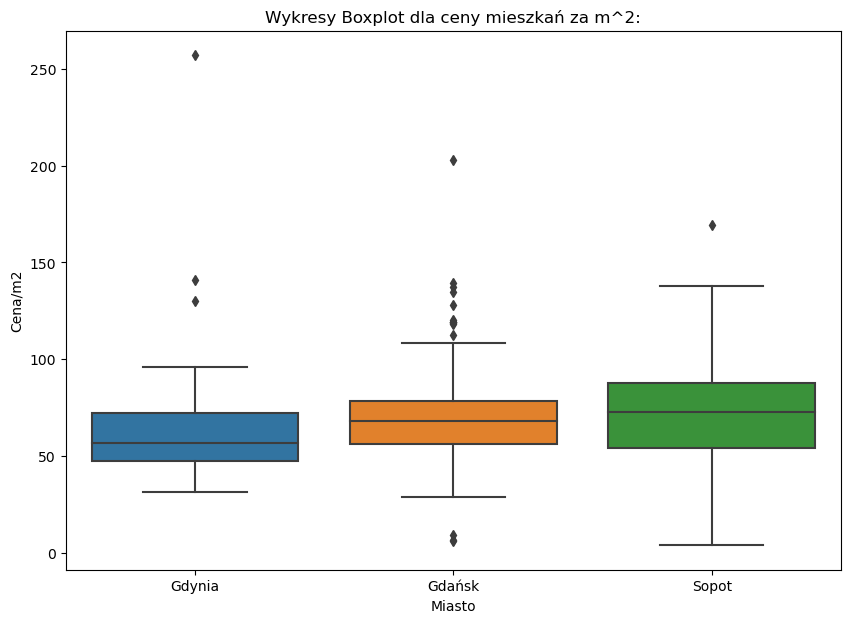

In [230]:
sns.boxplot(y="Cena/m2", x="Miasto", data=rent)
#można wyjebać rynek pierwotny jak brzydki jest
plt.title("Wykresy Boxplot dla ceny mieszkań za m^2:")
plt.show()

Cena za m^2 jest najwyższa w Sopocie, a najniższa w Gdyni.

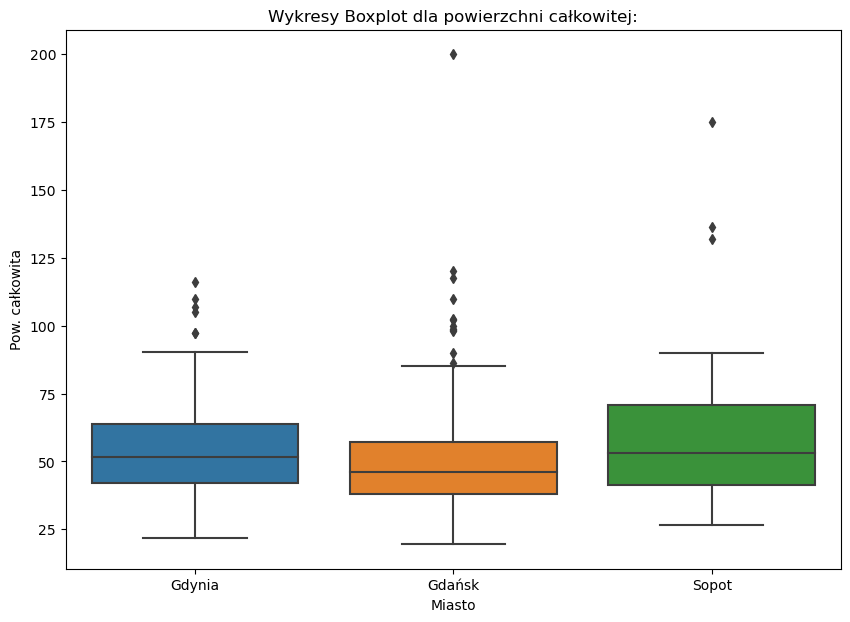

In [178]:
sns.boxplot(y="Pow. całkowita", x="Miasto", data=rent)
#można wyjebać rynek pierwotny jak brzydki jest
plt.title("Wykresy Boxplot dla powierzchni całkowitej:")
plt.show()

Największe mieszkania na wynajem są w Sopocie, najmniejsze w Gdańsku.

Text(0.5, 1.0, 'Histogram obrazujący rok budowy mieszkań:')

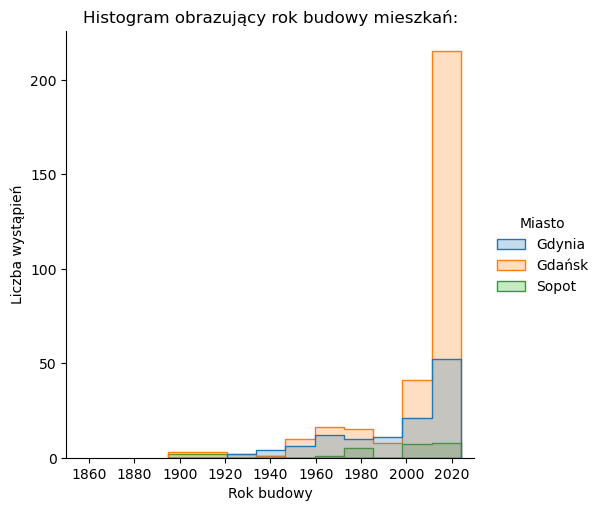

In [224]:
sns.displot(x = "Rok budowy", bins=10, data=rent, hue="Miasto", element="step")
plt.xlim(1850, 2030)
plt.ylabel("Liczba wystąpień")
plt.title("Histogram obrazujący rok budowy mieszkań:")
#można pomyśleć nad zmianą xlim, bins, wyjebać hue, zmienić displot na histplot

In [234]:
Tak jak w przypadku rynku sprzedaży - największy wzrost liczby mieszkań w Gdańsku po roku 2000.

SyntaxError: invalid syntax (2751509688.py, line 1)

Text(0.5, 1.0, 'Histogram obrazujący liczbę pokoi:')

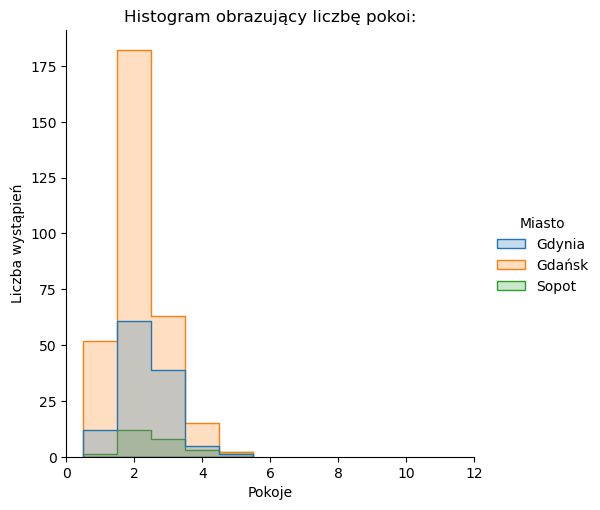

In [225]:
sns.displot(x = "Pokoje", bins=20, data=rent, hue="Miasto", discrete=True, element="step")
plt.xlim(0, 12)
plt.ylabel("Liczba wystąpień")
plt.title("Histogram obrazujący liczbę pokoi:")
#można pomyśleć nad zmianą xlim, bins, wyjebać hue, zmienić displot na histplot

Prawie wszystkie mieszkania na wynajem mają 2-4 pokoje.

Text(0.5, 1.0, 'Ceny mieszkań w poszczególnych miastach:')

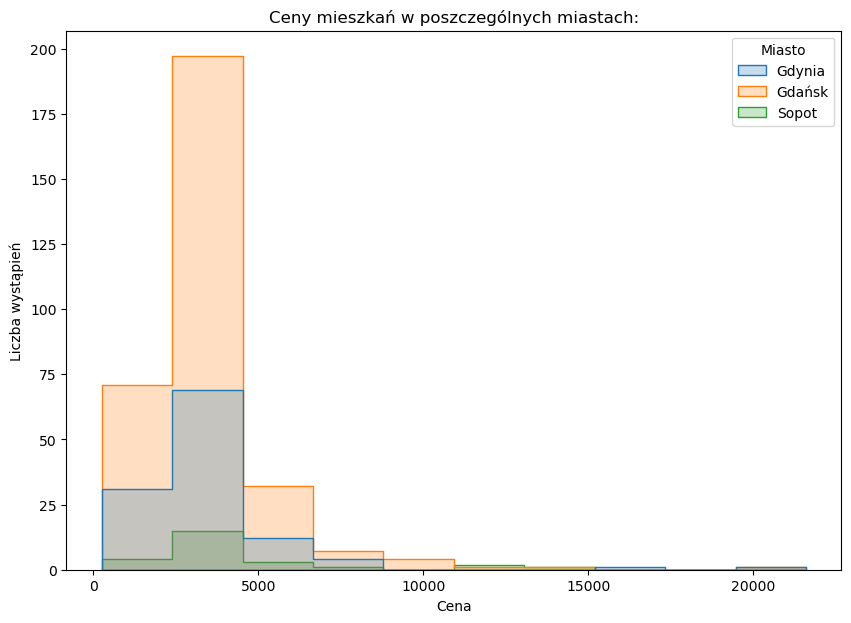

In [235]:
sns.histplot(data=rent, x="Cena", bins=10, hue="Miasto", element="step")
plt.ylabel("Liczba wystąpień")
plt.title("Ceny mieszkań w poszczególnych miastach:")

Koszt wynajmu znacznej większości mieszkań nie przekracza 5000 zł.

Text(0.5, 1.0, 'Histogram obrazujący cenę za m^2:')

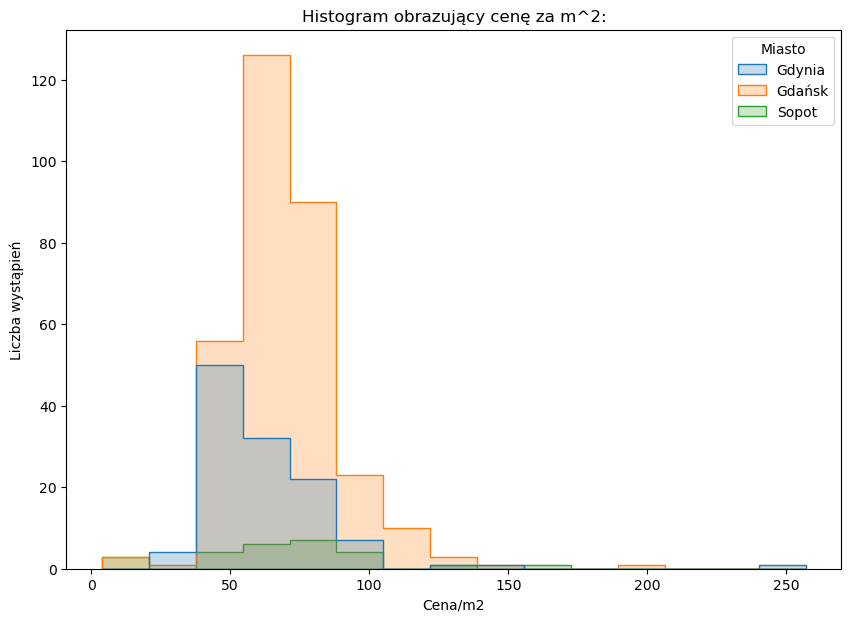

In [226]:
sns.histplot(data=rent, x="Cena/m2", hue="Miasto", bins=15, element="step")
plt.ylabel("Liczba wystąpień")
plt.title("Histogram obrazujący cenę za m^2:")

Większość cen mieszkań mieści się w przedziale 50-100 zł za m^2

In [190]:
gd_r = rent.where(rent.Miasto == "Gdańsk")
ga_r = rent.where(rent.Miasto == "Gdynia")
gsp_r = rent.where(rent.Miasto == "Sopot")

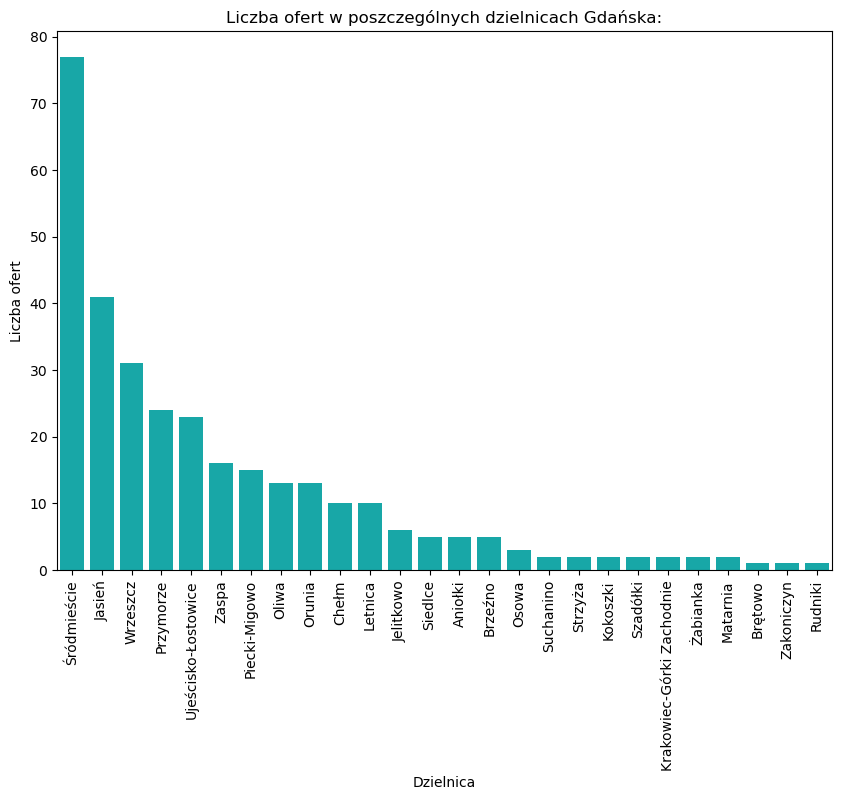

In [227]:
sns.countplot(data=gd_r.Dzielnica.value_counts(), x=gd_r.Dzielnica, order = gd_r.Dzielnica.value_counts().index, color="c")
plt.xticks(rotation=90)
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert w poszczególnych dzielnicach Gdańska:")
plt.show()

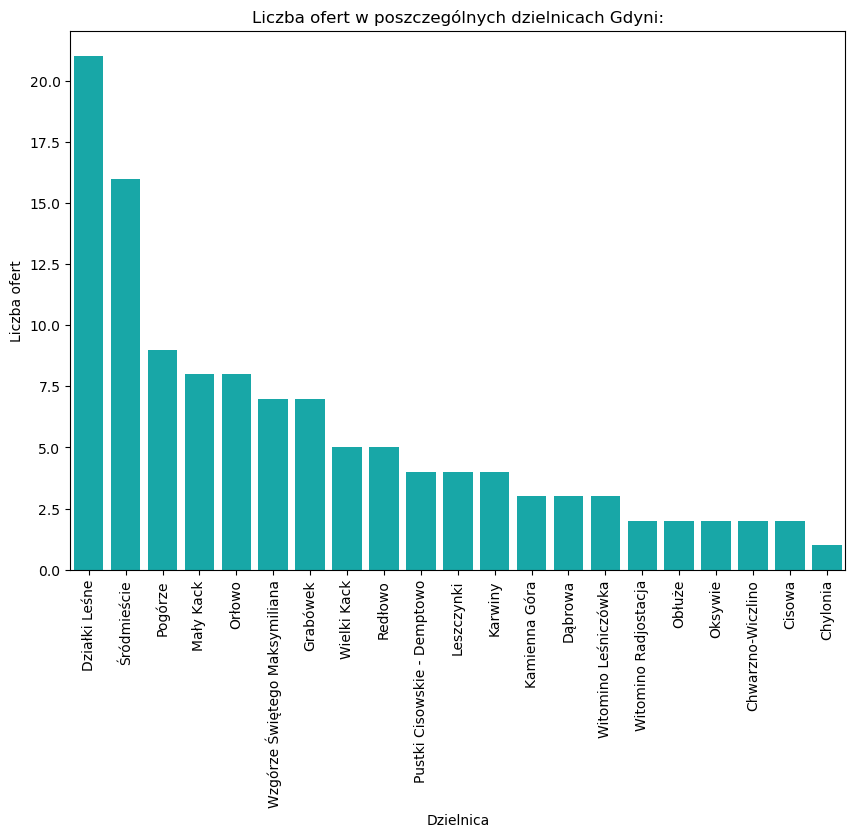

In [228]:
sns.countplot(data=ga_r.Dzielnica.value_counts(), x=ga_r.Dzielnica, order = ga_r.Dzielnica.value_counts().index, color="c")
plt.xticks(rotation=90)
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert w poszczególnych dzielnicach Gdyni:")
plt.show()

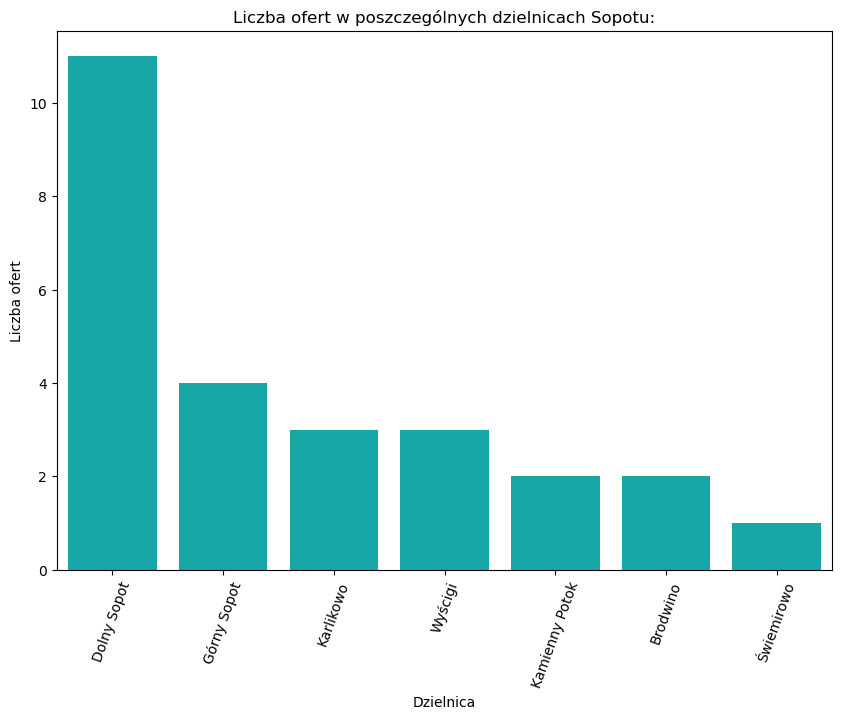

In [229]:
sns.countplot(data=gsp_r.Dzielnica.value_counts(), x=gsp_r.Dzielnica, order = gsp_r.Dzielnica.value_counts().index, color="c")
plt.xticks(rotation=70)
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert w poszczególnych dzielnicach Sopotu:")
plt.show()

In [37]:
# Najdroższe i najtańsze dzielnice (Cena)

dzielnice_r = rent.groupby(["Miasto", "Dzielnica"]).mean().sort_values("Cena/m2", ascending=False)

In [38]:
dzielnice_r["Liczba ofert"] = rent.groupby(["Miasto", "Dzielnica"])["Dzielnica"].count()
dzielnice_r

Cena  Pokoje  Pow. całkowita  \
Miasto Dzielnica                                                        
Sopot  Górny Sopot                   6,025.00    3.00           59.15   
Gdynia Śródmieście                   5,696.88    2.38           62.27   
Gdańsk Zaspa                         2,885.81    1.69           34.37   
       Rudniki                       2,600.00    2.00           30.00   
       Śródmieście                   4,462.71    2.27           54.05   
       Matarnia                      2,350.00    1.50           30.00   
Sopot  Karlikowo                     4,300.00    2.33           53.33   
       Wyścigi                       3,766.67    2.33           49.50   
Gdynia Kamienna Góra                 4,800.00    2.67           67.67   
Gdańsk Brzeźno                       2,518.00    1.40           34.75   
       Przymorze                     3,363.75    2.04           47.47   
       Szadółki                      2,450.00    1.50           34.30   
       Letnica                       3,130.00    2.10           45.11   
Gdynia Orłowo                        3,842.50    2.00           56.38   
Gdańsk Żabianka                      4,200.00    2.50           54.00   
       Oliwa                         4,030.77    2.54           57.52   
       Strzyża                       3,800.00    2.50           53.84   
       Wrzeszcz                      3,617.48    2.26           55.64   
Gdynia Działki Leśne                 3,957.14    2.29           59.16   
Gdańsk Kokoszki                      2,550.00    1.50           38.52   
Gdynia Wzgórze Świętego Maksymiliana 3,657.14    2.43           61.14   
Gdańsk Krakowiec-Górki Zachodnie     2,550.00    2.00           39.40   
       Siedlce                       3,100.00    2.20           48.02   
Sopot  Dolny Sopot                   4,922.73    2.91           78.04   
Gdańsk Suchanino                     4,650.00    3.00           70.50   
       Piecki-Migowo                 2,846.00    2.13           46.78   
Gdynia Cisowa                        3,425.00    2.50           52.50   
Gdańsk Ujeścisko-Łostowice           2,584.26    2.00           44.02   
Sopot  Świemirowo                    2,800.00    2.00           47.00   
Gdańsk Jasień                        2,795.12    2.10           48.40   
Gdynia Mały Kack                     2,837.50    2.00           49.52   
Sopot  Kamienny Potok                2,600.00    2.00           46.00   
Gdynia Chwarzno-Wiczlino             2,350.00    2.00           41.41   
Gdańsk Orunia                        2,380.69    2.00           43.26   
Gdynia Obłuże                        2,650.00    2.50           47.86   
Gdańsk Chełm                         2,325.00    2.10           43.31   
       Aniołki                       3,540.00    2.80           68.56   
Gdynia Grabówek                      2,228.57    1.86           43.25   
       Witomino Leśniczówka          2,333.33    2.33           44.67   
       Karwiny                       2,750.00    2.50           53.85   
       Pogórze                       2,766.67    2.67           52.21   
Gdańsk Jelitkowo                     3,416.67    2.50           61.29   
Sopot  Brodwino                      3,200.00    3.50           61.50   
Gdynia Redłowo                       2,399.80    1.80           45.51   
       Oksywie                       3,750.00    3.50           73.00   
Gdańsk Osowa                         2,600.00    2.00           51.73   
Gdynia Leszczynki                    2,022.50    2.00           41.75   
       Wielki Kack                   3,000.00    2.60           68.24   
       Dąbrowa                       2,500.00    2.67           55.03   
Gdańsk Zakoniczyn                    2,300.00    2.00           50.00   
Gdynia Witomino Radjostacja          2,050.00    2.00           45.77   
       Chylonia                      2,000.00    3.00           46.50   
Gdańsk Brętowo                       2,510.00    3.00           60.50   
Gdynia Pustki Cisowskie - 

Najdroższe mieszkania pod względem ceny za metr kwadratowy (pomijając pojedyncze oferty) występują w Górnym Sopocie, w Gdyni Śródmieście, na Zaspie. Najtańsze mieszkania znajdują się w Pustkach Cisowskich, na Witominie, Zakoniczynie.